In [3]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_binary_health_indicators_BRFSS2015.csv to diabetes_binary_health_indicators_BRFSS2015.csv


<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Diabetic               229474 non-null  int64   
 1   High_BP                229474 non-null  int64   
 2   High_Cholesterol       229474 non-null  int64   
 3   Cholesterol_Check      229474 non-null  int64   
 4   BMI                    229474 non-null  float64 
 5   Smoker                 229474 non-null  int64   
 6   Stroke                 229474 non-null  int64   
 7   HeartDiseaseorAttack   229474 non-null  int64   
 8   Physical_Activity      229474 non-null  int64   
 9   Fruits                 229474 non-null  int64   
 10  Veggies                229474 non-null  int64   
 11  Heavy_Alcohol          229474 non-null  int64   
 12  AnyHealthcare          229474 non-null  int64   
 13  No_Doctor_Due_To_Cost  229474 non-null  int64   
 14  GenHlth                22

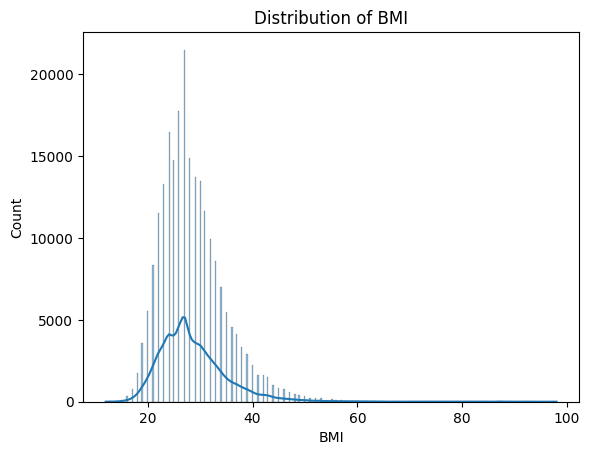

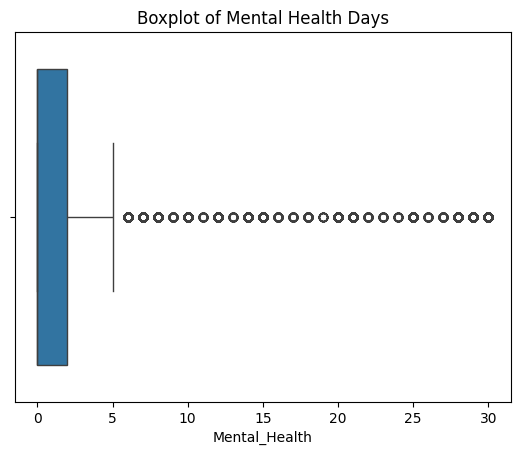

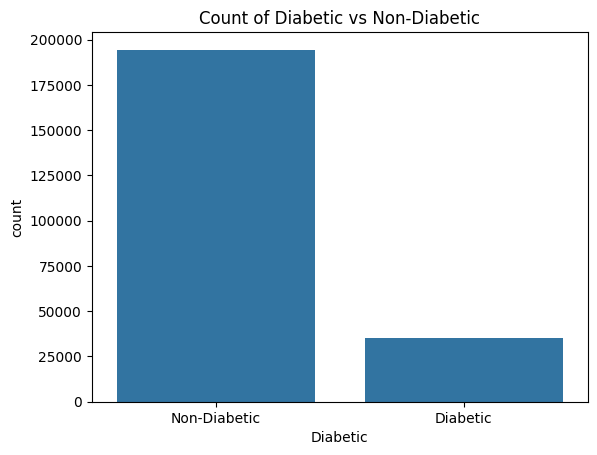

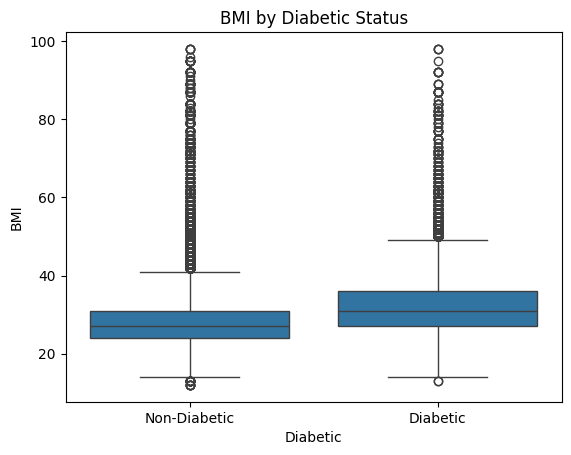

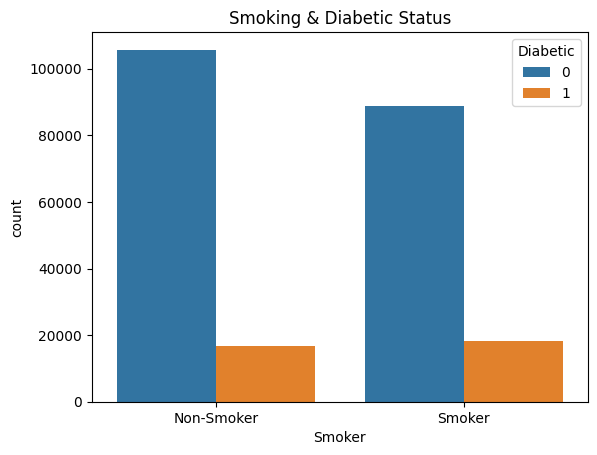

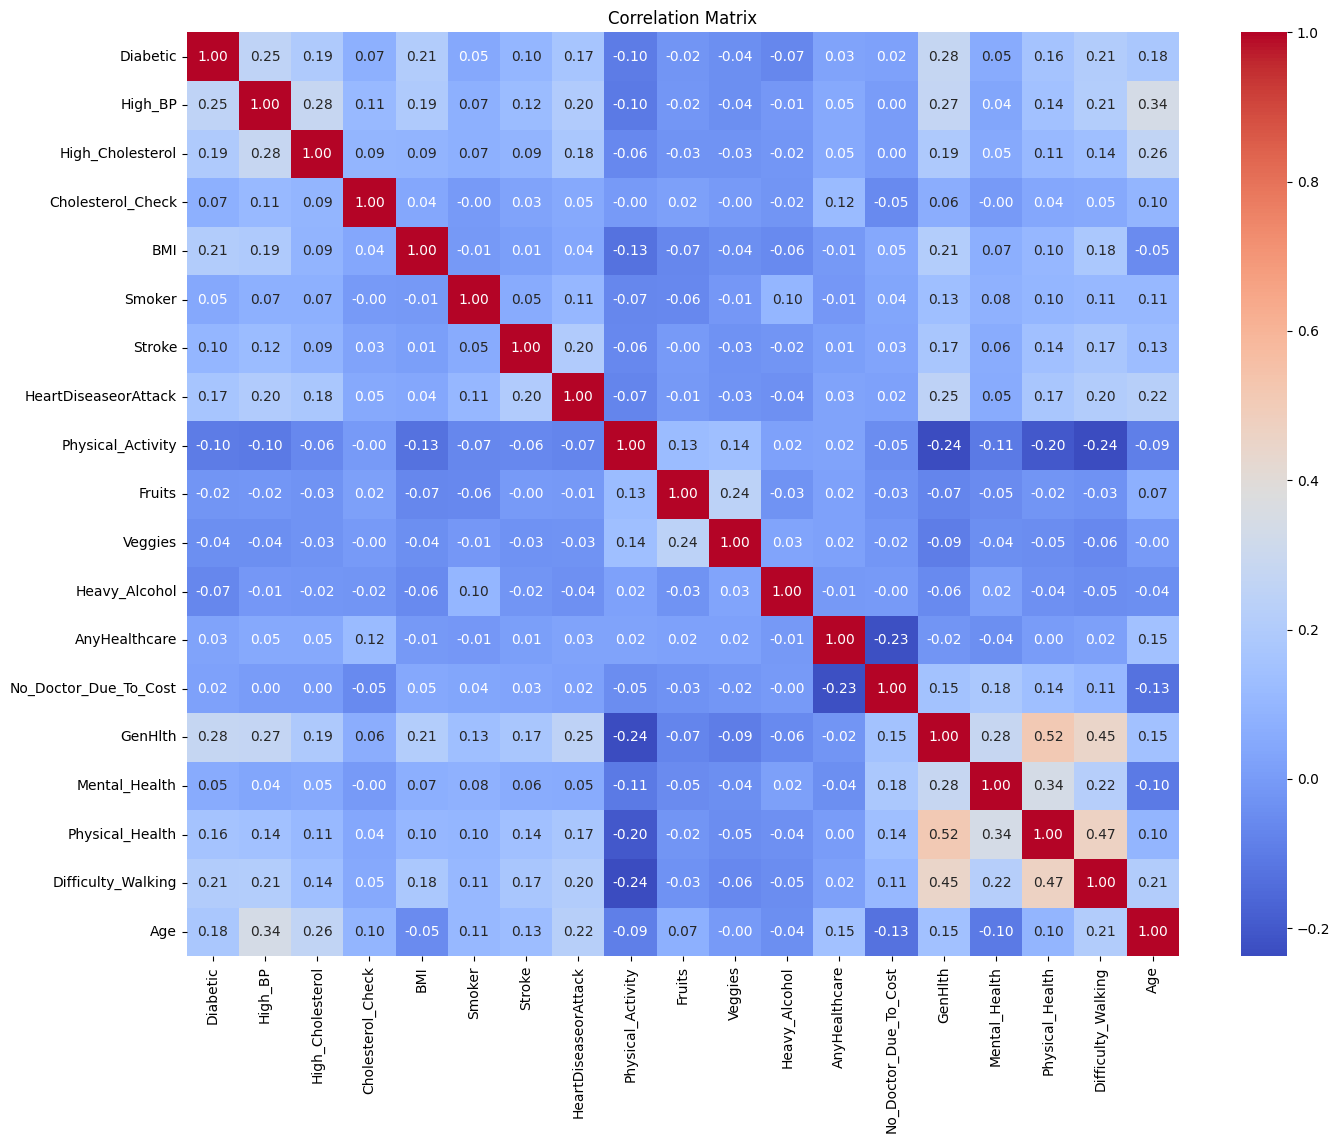

'\n- Promote health education on BMI, mental wellness, and smoking risks.\n- Target public health programs for high-risk groups (older age, low income).\n- Collect more behavioral and sleep data for stronger prediction models.\n'

In [12]:
# 📊 EDA on Diabetes Health Indicators Dataset

# 🔧 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 📁 2. Load Dataset
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

# 🧹 3. Data Cleaning
# Rename columns for clarity
df.rename(columns={
    'Diabetes_binary': 'Diabetic',
    'HighBP': 'High_BP',
    'HighChol': 'High_Cholesterol',
    'CholCheck': 'Cholesterol_Check',
    'PhysActivity': 'Physical_Activity',
    'HvyAlcoholConsump': 'Heavy_Alcohol',
    'NoDocbcCost': 'No_Doctor_Due_To_Cost',
    'DiffWalk': 'Difficulty_Walking',
    'MentHlth': 'Mental_Health',
    'PhysHlth': 'Physical_Health'
}, inplace=True)

# Convert binary flags to integers
binary_cols = [
    'Diabetic', 'High_BP', 'High_Cholesterol', 'Cholesterol_Check',
    'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Physical_Activity',
    'Fruits', 'Veggies', 'Heavy_Alcohol', 'AnyHealthcare',
    'No_Doctor_Due_To_Cost', 'Difficulty_Walking', 'Sex'
]
df[binary_cols] = df[binary_cols].astype(int)

# Convert categorical columns
category_cols = ['Sex', 'Education', 'Income']
for col in category_cols:
    df[col] = df[col].astype('category')

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Confirm clean structure
df.info()

# 📊 4. Univariate Analysis

# BMI distribution
sns.histplot(df['BMI'], kde=True)
plt.title("Distribution of BMI")
plt.show()

# Mental health days
sns.boxplot(x=df['Mental_Health'])
plt.title("Boxplot of Mental Health Days")
plt.show()

# Count of Diabetic vs Non-Diabetic
sns.countplot(x='Diabetic', data=df)
plt.title("Count of Diabetic vs Non-Diabetic")
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

# 🔗 5. Bivariate Analysis

# BMI by Diabetic status
sns.boxplot(x='Diabetic', y='BMI', data=df)
plt.title("BMI by Diabetic Status")
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

# Smoking vs Diabetic
sns.countplot(x='Smoker', hue='Diabetic', data=df)
plt.title("Smoking & Diabetic Status")
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()

# 🔥 6. Correlation Analysis

plt.figure(figsize=(16,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 💡 7. Key Insights
"""
- Higher BMI is significantly associated with being diabetic.
- Smoking shows a mild correlation with diabetes.
- Difficulty walking and high cholesterol are more common in diabetic patients.
"""

# 📌 8. Conclusion & Recommendations
"""
- Promote health education on BMI, mental wellness, and smoking risks.
- Target public health programs for high-risk groups (older age, low income).
- Collect more behavioral and sleep data for stronger prediction models.
"""
